In [ ]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 43.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import rdkit as rd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import random
import rdkit.Chem.QED as QED
from rdkit.Chem import Draw, Descriptors

In [ ]:
def tanimoto_distance(fn):
  #List of Morgan fingerprints of molecules
  fingerprints = []
  t_mols = []
  #Read in data file line by line
  for line in open(fn, "r"):
      #Convert SMILES string to Morgan fingerprint
      mol = Chem.MolFromSmiles(line.replace("\n", ""))
      if mol:
        t_mols.append(mol)
        fingerprint = AllChem.GetMorganFingerprint(mol, 2)

        #Add to list of fingerprints
        fingerprints.append(fingerprint)
  nummols = len(fingerprints)
  print(nummols)
  #Total Tanimoto Distance
  tanimoto = 0

  randfings = random.sample(fingerprints, nummols)

  #Calculate Tanimoto Distance between each pair of fingerprints
  for fpt1 in randfings:
      for fpt2 in randfings:

          if fpt1 != fpt2:

              #Calculate Tanimoto Similarity
              tan = TanimotoSimilarity(fpt1, fpt2)
              tanimoto += tan

  #Average Tanimoto Similarity
  avg_tanimoto = (1 / (nummols * (nummols - 1))) * tanimoto
  return avg_tanimoto

In [ ]:
tanimoto_distance("/content/random_training_dataset.csv")

FileNotFoundError: ignored

In [ ]:
global num_mols_total
global over_ro5
global over_thresh
over_thresh = 0
over_ro5 = 0
num_mols_total = 0

In [ ]:
def thresholds(fn):
  t_mols = []
  global num_mols_total
  global over_ro5
  global over_thresh
  #Read in data file line by line
  for line in open(fn, "r"):
      mol = Chem.MolFromSmiles(line.replace("\n", ""))
      if mol:
        t_mols.append(mol)
        num_mols_total += 1
  QED_vals = []
  errors = 0
  for mol in t_mols:
    try:
      QED_vals.append(QED.qed(mol))
    except:
      print("error")
      errors +=1
  i = 0
  d = 0
  avg=0
  for qed in QED_vals:
    if qed >= 0.37:
      i+=1
      over_ro5 += 1
    if qed >= 0.586:
      d+=1
      over_thresh += 1
    avg+=qed
  return i/(len(t_mols)),d/(len(t_mols)), avg/(len(t_mols)), errors

In [ ]:
def all(fns):
  td, i, d, avg = [], [], [], []
  errors = 0
  for fn in fns:
    (ix,dx, avgx, errorsx) = thresholds(fn)
    tdx = tanimoto_distance(fn)
    td.append(tdx)
    i.append(ix)
    d.append(dx)
    avg.append(avgx)
    errors += errorsx
  print(errors)
  return td, i, d, avg

In [ ]:
td, i, d, avg = all(['/content/generated_smiles_nextgen_v1 (QED - 0.58 avg).csv','/content/generated_smiles_nextgen_v2.csv', '/content/generated_smiles_nextgen_v3 - retry.csv','/content/generated_smiles_nextgen_v4 - retry.csv','/content/generated_smiles_nextgen_v5 - retry.csv'])
print(num_mols_total)
print(over_ro5)
print(over_thresh)

[00:29:34] Explicit valence for atom # 7 O, 3, is greater than permitted
[00:29:34] Explicit valence for atom # 9 O, 3, is greater than permitted
[00:29:34] Explicit valence for atom # 16 C, 5, is greater than permitted
[00:29:34] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:29:34] Explicit valence for atom # 12 O, 3, is greater than permitted
[00:29:34] Explicit valence for atom # 8 O, 3, is greater than permitted
[00:29:34] Explicit valence for atom # 5 O, 4, is greater than permitted
[00:29:34] Explicit valence for atom # 14 N, 4, is greater than permitted
[00:29:35] Explicit valence for atom # 7 O, 3, is greater than permitted
[00:29:35] Explicit valence for atom # 9 O, 3, is greater than permitted
[00:29:35] Explicit valence for atom # 16 C, 5, is greater than permitted
[00:29:35] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:29:35] Explicit valence for atom # 12 O, 3, is greater than permitted
[00:29:36] Explicit valence for atom # 8 O, 3,

677


[00:29:37] Explicit valence for atom # 10 O, 3, is greater than permitted
[00:29:37] Conflicting single bond directions around double bond at index 7.
[00:29:37]   BondStereo set to STEREONONE and single bond directions set to NONE.
[00:29:37] Explicit valence for atom # 5 O, 3, is greater than permitted
[00:29:37] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:29:37] Explicit valence for atom # 17 O, 3, is greater than permitted
[00:29:37] Explicit valence for atom # 21 O, 3, is greater than permitted
[00:29:39] Explicit valence for atom # 10 O, 3, is greater than permitted
[00:29:39] Conflicting single bond directions around double bond at index 7.
[00:29:39]   BondStereo set to STEREONONE and single bond directions set to NONE.
[00:29:39] Explicit valence for atom # 5 O, 3, is greater than permitted
[00:29:40] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:29:40] Explicit valence for atom # 17 O, 3, is greater than permitted
[00:29:40] Explicit 

1425


[00:29:52] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:29:52] Explicit valence for atom # 22 N, 4, is greater than permitted
[00:29:52] Explicit valence for atom # 10 O, 3, is greater than permitted
[00:29:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:29:53] Explicit valence for atom # 22 N, 4, is greater than permitted
[00:29:53] Explicit valence for atom # 10 O, 3, is greater than permitted


333


[00:29:53] Explicit valence for atom # 8 O, 3, is greater than permitted
[00:29:53] Explicit valence for atom # 21 O, 3, is greater than permitted
[00:29:53] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:29:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:29:53] Explicit valence for atom # 14 O, 3, is greater than permitted
[00:29:54] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17


error


[00:29:55] Explicit valence for atom # 8 O, 3, is greater than permitted
[00:29:55] Explicit valence for atom # 21 O, 3, is greater than permitted
[00:29:55] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:29:55] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:29:55] Explicit valence for atom # 14 O, 3, is greater than permitted


1081


[00:30:02] Explicit valence for atom # 16 N, 4, is greater than permitted
[00:30:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[00:30:02] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:30:02] Explicit valence for atom # 11 O, 3, is greater than permitted
[00:30:02] Explicit valence for atom # 11 O, 3, is greater than permitted
[00:30:02] Explicit valence for atom # 14 O, 3, is greater than permitted
[00:30:02] Explicit valence for atom # 14 N, 4, is greater than permitted
[00:30:02] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:30:03] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:30:07] Explicit valence for atom # 16 N, 4, is greater than permitted
[00:30:07] Explicit valence for atom # 3 C, 5, is greater than permitted
[00:30:08] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:30:08] Explicit valence for atom # 11 O, 3, is greater than permitted
[00:30:08] Explicit valence for atom # 11 

3287
1
6803
6354
4769


In [ ]:
# total_chars = 0
# total_mols = 0
# for fn in ["/content/nextgen_smiles_cleanedv1", "/content/nextgen_smiles_cleanedv2", "/content/nextgen_smiles_cleanedv3 - retry", "/content/nextgen_smiles_cleanedv4 - retry", "/content/nextgen_smiles_cleanedv5 - retry"]:
#   for line in open(fn, "r"):
#     total_mols += 1
#     total_chars += len(line)
# print(total_chars)
# print(total_mols)

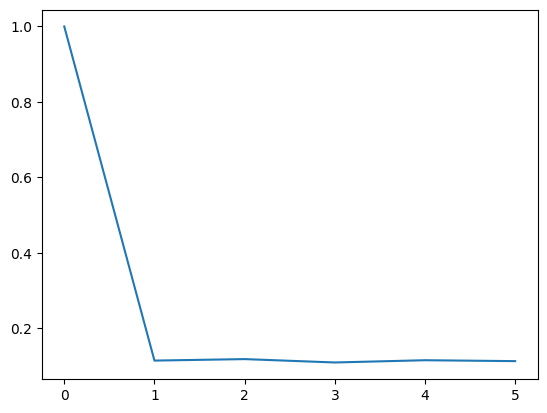

In [ ]:
#tanimoto distance
import matplotlib.pyplot as plt
tdgraph = [1] + td
plt.plot(tdgraph)
plt.show()

In [ ]:
def QED_vals(fn):
  vals = []
  total = 0
  errors = 0
  for line in open(fn, "r"):
      total+=1
      mol = Chem.MolFromSmiles(line.replace("\n", ""))
      if mol:
        try:
          vals.append(QED.qed(mol))
        except:
          print("error")
          errors+=1
      else:
        print('error')
        errors+=1
  print('Total: ' + str(total))
  print(errors/total)
  return vals

In [ ]:
vals = QED_vals('/content/generated_smiles_nextgen_v1 (QED - 0.58 avg).csv')

[00:18:43] Explicit valence for atom # 7 O, 3, is greater than permitted
[00:18:43] Explicit valence for atom # 9 O, 3, is greater than permitted


error
error


[00:18:43] Explicit valence for atom # 16 C, 5, is greater than permitted
[00:18:44] Explicit valence for atom # 2 N, 4, is greater than permitted


error
error


[00:18:44] Explicit valence for atom # 12 O, 3, is greater than permitted


error


[00:18:44] Explicit valence for atom # 8 O, 3, is greater than permitted
[00:18:44] Explicit valence for atom # 5 O, 4, is greater than permitted
[00:18:44] Explicit valence for atom # 14 N, 4, is greater than permitted


error
error
error
Total: 685
0.01167883211678832


In [ ]:
vals = QED_vals('/content/generated_smiles_nextgen_v5 - retry.csv')

[00:18:47] Explicit valence for atom # 16 N, 4, is greater than permitted
[00:18:47] Explicit valence for atom # 3 C, 5, is greater than permitted


error
error


[00:18:50] Explicit valence for atom # 12 N, 4, is greater than permitted


error


[00:18:50] Explicit valence for atom # 11 O, 3, is greater than permitted
[00:18:50] Explicit valence for atom # 11 O, 3, is greater than permitted
[00:18:50] Explicit valence for atom # 14 O, 3, is greater than permitted


error
error
error


[00:18:51] Explicit valence for atom # 14 N, 4, is greater than permitted


error


[00:18:52] Explicit valence for atom # 1 N, 4, is greater than permitted


error
error
Total: 3296
0.0027305825242718447


[00:18:54] Explicit valence for atom # 1 N, 4, is greater than permitted


[00:20:10] Explicit valence for atom # 7 O, 3, is greater than permitted
[00:20:10] Explicit valence for atom # 9 O, 3, is greater than permitted


error
error


[00:20:10] Explicit valence for atom # 16 C, 5, is greater than permitted
[00:20:10] Explicit valence for atom # 2 N, 4, is greater than permitted


error
error


[00:20:11] Explicit valence for atom # 12 O, 3, is greater than permitted


error


[00:20:11] Explicit valence for atom # 8 O, 3, is greater than permitted
[00:20:11] Explicit valence for atom # 5 O, 4, is greater than permitted
[00:20:11] Explicit valence for atom # 14 N, 4, is greater than permitted


error
error
error
Total: 685
0.01167883211678832


[00:20:12] Explicit valence for atom # 16 N, 4, is greater than permitted
[00:20:12] Explicit valence for atom # 3 C, 5, is greater than permitted


error
error


[00:20:14] Explicit valence for atom # 12 N, 4, is greater than permitted


error


[00:20:14] Explicit valence for atom # 11 O, 3, is greater than permitted
[00:20:14] Explicit valence for atom # 11 O, 3, is greater than permitted
[00:20:14] Explicit valence for atom # 14 O, 3, is greater than permitted


error
error
error


[00:20:14] Explicit valence for atom # 14 N, 4, is greater than permitted


error


[00:20:15] Explicit valence for atom # 1 N, 4, is greater than permitted


error


[00:20:17] Explicit valence for atom # 1 N, 4, is greater than permitted


error
Total: 3296
0.0027305825242718447


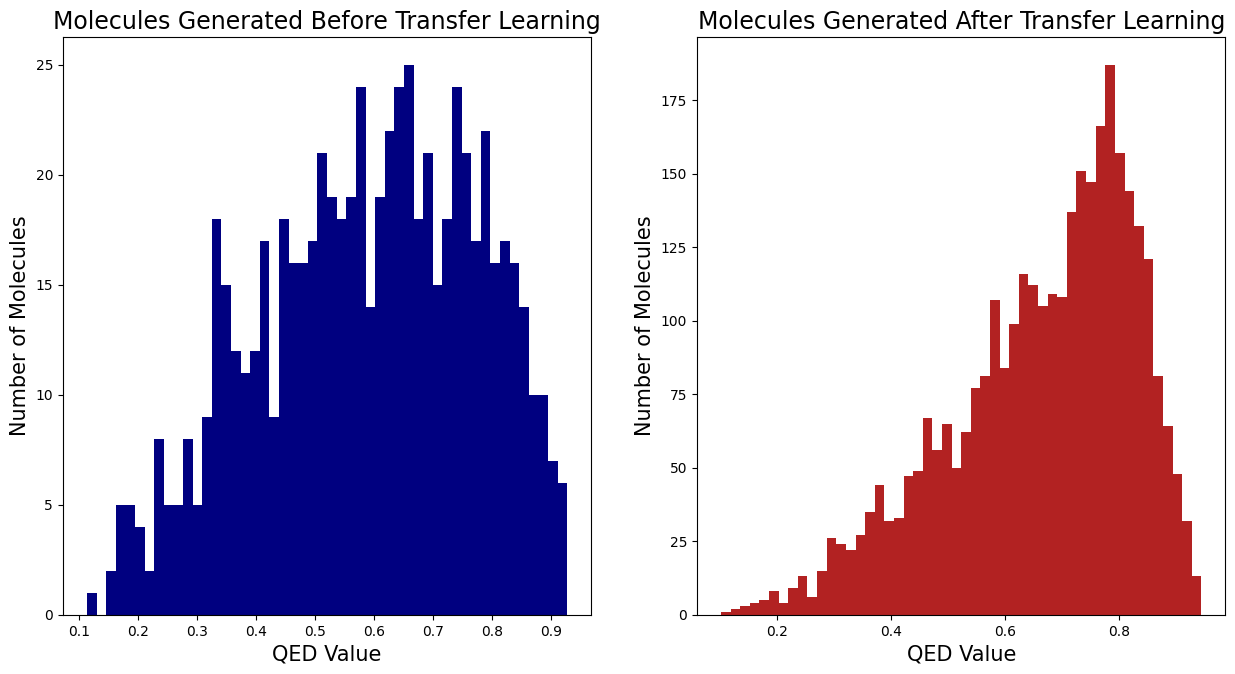

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
ax1.hist(QED_vals('/content/generated_smiles_nextgen_v1 (QED - 0.58 avg).csv'), bins = 50, color ='navy')
ax1.set_xlabel('QED Value', fontsize = 15)
ax1.set_ylabel('Number of Molecules', fontsize = 15)
ax1.set_title('Molecules Generated Before Transfer Learning', fontsize = 17)

ax2.hist(QED_vals('/content/generated_smiles_nextgen_v5 - retry.csv'), bins = 50, color='firebrick')
ax2.set_xlabel('QED Value', fontsize = 15)
ax2.set_ylabel('Number of Molecules', fontsize = 15)
ax2.set_title('Molecules Generated After Transfer Learning', fontsize = 17)
plt.savefig("Histograms_QED.jpeg", format="jpg", dpi=1200)
plt.show()

In [ ]:
for index in range(0,len(i)):
  i[index] = i[index] * 100
for index in range(0, len(d)):
  d[index] = d[index] * 100


In [ ]:
val_dict = {}
for line in open('/content/nextgen_smiles_cleanedv5 - retry', "r"):
    mol = Chem.MolFromSmiles(line.replace("\n", ""))
    if mol:
      try:
        val_dict[line.replace("\n", "")] = QED.qed(mol)
      except:
        print("error")

val_dict = sorted(val_dict.items(), key=lambda x: x[1])
print(val_dict)

[('CC/C(=O)COC/c2cn(CF)n2[C@@H]2n1ncn2CCCC1', 0.7660399566417044), ('CCOS/C1cccccccc(cn1)O', 0.7663728039516883), ('CCC[C@@H]1Cc2sccc2c2ncoc12', 0.7665466731076443), ('COC/c1ccccc1OC[C@H]1CCCCC2CCC(CS12)C', 0.7666457786877383), ('c1ccnc2c1OC1CCCNC2C2C[C@@H]([C@@H](O)C2)S1', 0.7667402264474368), ('CNc1/cccc(O)ccc1-c1cc2cN[nH]2CC1=O', 0.7667409373117215), ('O=C(F)C1C2CC2Oc2c(onn2)CC(CF)C1C', 0.766968320683841), ('CCCBr.C(O)/C1=CC2ccc3nc2c1-3', 0.7670182603837175), ('CC1CC(=O)Sc2c3c(C)nnn3c2C1CC', 0.7671164601910427), ('CCc1cc([C@H][C@@H](NC[C@@H]2Cn3nnn3CC2)on1)CCCC#N', 0.7671393392200918), ('Cc1[C@@H]CNCNCCCC(=O)c2ccc(F)cc2N1C', 0.767180315421769), ('FCCN1CCCSC(c2ccccc2)CCS1', 0.7672540380434772), ('O.C[C@@H](CNC1CCCCCCCn2ncn3CC(c4ccccc43)C21)[C@@H](F)CO', 0.767266539127585), ('Cn1/ccc(O/Nc2ccnnnnn2)n1', 0.7672843699550957), ('CC/C(c1cccs1([C@@](C)C)CCF)O', 0.7673353817248723), ('CCc1ccccOc1O/N1CC[C@@H]2CCSNC(=O)N21.CN', 0.7673462475272368), ('CC#Cc1ncccc1O[C@]1C=CC[C@@H]2CCC21CC', 0.76

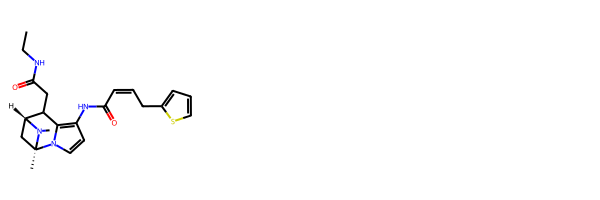

In [ ]:
best_mols = ['CCNC(=O)CC1c2c(NC(=O)/C=C\\Cc3cccs3)ccn2[C@@]2(C)C[C@H]1N2C']
mol_list = [Chem.MolFromSmiles(smiles) for smiles in best_mols]
Chem.Draw.MolsToGridImage(mol_list)


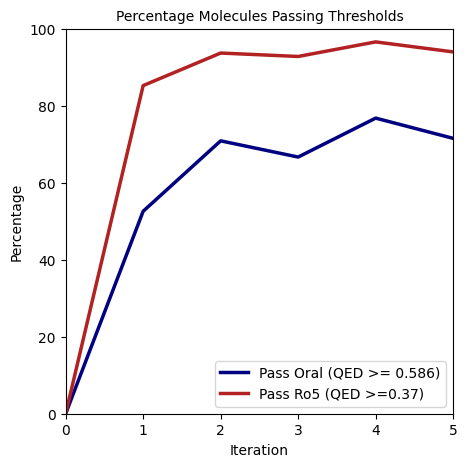

In [ ]:
import math
igraph = [0] + i
dgraph = [0] + d
labels = ['Pass Oral (QED >= 0.586)', 'Pass Ro5 (QED >=0.37)']
# avggraph = [0] + avg

plt.figure(figsize=(5,5))
plt.ylim(0,100)
plt.plot(dgraph, linewidth = 2.5, c = 'navy')
plt.plot(igraph, linewidth = 2.5, c= 'firebrick')
new_list = range(0,6)
plt.xlim(0,5)
plt.xticks(new_list)
plt.xlabel('Iteration')
plt.ylabel('Percentage')
plt.title('Percentage Molecules Passing Thresholds', fontsize=10)
plt.legend(labels)
#plt.plot(avggraph)
plt.savefig("Percent_passing.jpeg", format="jpg", dpi=1200)
plt.show()

In [ ]:
print(i)
print(d)
print(td)

In [ ]:
fn = "/content/generated_smiles_nextgen_v2 .csv"
new_fn = fn[:-4]
print(new_fn)

In [ ]:
import csv
import numpy as np
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def PCA_analyze(fn):
  t_mols = []
  #Read in data file line by line
  for line in open(fn, "r"):
      #Convert SMILES string to Morgan fingerprint
      mol = Chem.MolFromSmiles(line.replace("\n", ""))
      if mol:
        t_mols.append(mol)
  header = ['num', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS']
  new_fn = fn[:-4] + "_props.csv"
  with open(new_fn, 'w', encoding='UTF8', newline='') as f:
      writer = csv.writer(f)

      # write the header
      writer.writerow(header)
      mol_num = 0
      for mol in t_mols:
        try:
          row = [mol_num, QED.properties(mol)[0],QED.properties(mol)[1],QED.properties(mol)[2],QED.properties(mol)[3],QED.properties(mol)[4],QED.properties(mol)[5],QED.properties(mol)[6],QED.properties(mol)[7],]
          mol_num += 1
          writer.writerow(row)
        except:
          print('error')
  mol_data = genfromtxt(new_fn, delimiter=',')
  mol_data = np.delete(mol_data, 0, 0)
  mol_data = np.delete(mol_data, 0, 1)
  x = StandardScaler().fit_transform(mol_data) # normalizing the features
  pca_mols = PCA(n_components=2)
  principalComponents_mols = pca_mols.fit_transform(x)
  principal_mols_Df = pd.DataFrame(data = principalComponents_mols, columns = ['principal component 1', 'principal component 2'])
  print('Explained variation per principal component: {}'.format(pca_mols.explained_variance_ratio_))
  #PC1 holds x% of data and PC2 holds y%, and 100-x-y% data is lost when projecting
  return principal_mols_Df

In [ ]:
import pickle
import random
import pandas as pd
# create data load functions
def load_data(data):
    with open(data, 'rb') as fp:
        smiles = pickle.load(fp)

    return smiles

# load dataset & break into train/test sets
smifile = '/content/valid_smiles_data'
data = load_data(smifile)
random_smi = random.sample(data,20000)
df = pd.DataFrame(random_smi)
df.to_csv('random_training_dataset.csv', index=False)

In [ ]:
training_dataset_PCA_Df = PCA_analyze("/content/random_training_dataset.csv")

Explained variation per principal component: [0.30108561 0.18443442]


In [ ]:
import matplotlib.pyplot as plt
gen_mols_v1_PCA_Df = PCA_analyze("/content/generated_smiles_nextgen_v1 (QED - 0.58 avg).csv")
gen_mols_v2_PCA_Df = PCA_analyze("/content/generated_smiles_nextgen_v2.csv")
gen_mols_v3_PCA_Df = PCA_analyze("/content/generated_smiles_nextgen_v3 - retry.csv")
gen_mols_v4_PCA_Df = PCA_analyze("/content/generated_smiles_nextgen_v4 - retry.csv")
gen_mols_v5_PCA_Df = PCA_analyze("/content/generated_smiles_nextgen_v5 - retry.csv")

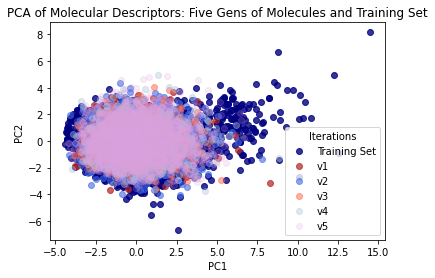

In [ ]:
plt.figure()
plt.scatter(
    x="principal component 1", y="principal component 2",
    data=training_dataset_PCA_Df, c='navy', label = 'Training Set', alpha = 0.8
)

plt.scatter(
    x="principal component 1", y="principal component 2",
    data=gen_mols_v1_PCA_Df, c='firebrick', label = 'v1', alpha = 0.7
)
plt.scatter(
    x="principal component 1", y="principal component 2",
    data=gen_mols_v2_PCA_Df, c='royalblue', label = 'v2', alpha = 0.6
)
plt.scatter(
    x="principal component 1", y="principal component 2",
    data=gen_mols_v3_PCA_Df, c='tomato', label = 'v3', alpha = 0.5
)
plt.scatter(
    x="principal component 1", y="principal component 2",
    data=gen_mols_v4_PCA_Df, c='lightsteelblue', label = 'v4', alpha = 0.4
)
plt.scatter(
    x="principal component 1", y="principal component 2",
    data=gen_mols_v5_PCA_Df, c='plum', label = 'v5', alpha = 0.2
)

plt.title('PCA of Molecular Descriptors: Five Gens of Molecules and Training Set')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(loc='lower right', title = "Iterations")
plt.savefig("PCA - Five Gens and Training.png", format="png", dpi=1200)
plt.show()

In [ ]:
import pandas as pd

# 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS'

MW, ALOGP, HBA, HBD, PSA, ROTB, AROM, ALERTS = [], [],[],[],[],[],[],[]
def box_whisker(fn):
  props = pd.read_csv(fn)
  MW.append(props['MW'].to_list())
  ALOGP.append(props['ALOGP'].to_list())
  HBA.append(props['HBA'].to_list())
  HBD.append(props['HBD'].to_list())
  PSA.append(props['PSA'].to_list())
  ROTB.append(props['ROTB'].to_list())
  AROM.append(props['AROM'].to_list())
  ALERTS.append(props['ALERTS'].to_list())

In [ ]:
box_whisker('/content/generated_smiles_nextgen_v1 (QED - 0.58 avg)_props.csv')
box_whisker('/content/generated_smiles_nextgen_v5 - retry_props.csv')


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

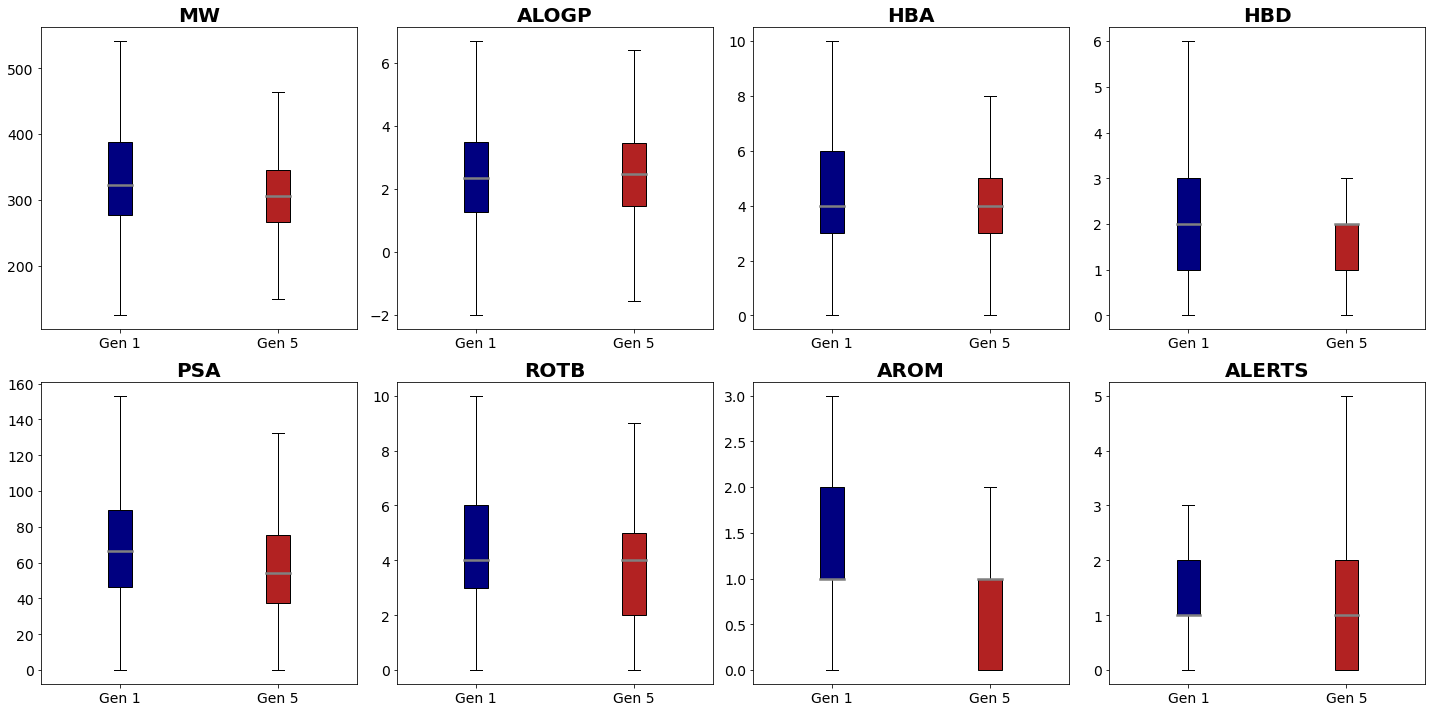

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Gen 1', 'Gen 5']
titles = ['MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS']
datas = [MW, ALOGP, HBA, HBD, PSA, ROTB, AROM, ALERTS]
medianprops = dict(linewidth=2.5, color='grey')

fig, axs = plt.subplots(2, 4, figsize=(20,10))

colors = ['navy', 'firebrick']
for i, ax in enumerate(axs.flat):
    bp = ax.boxplot(datas[i], showfliers = False, labels=labels, patch_artist = True, medianprops = medianprops)
    ax.set_title(titles[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize = 14)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

plt.tight_layout()

plt.savefig("Box_Whisker - 5th Gen.png", format="png", dpi=1200)
plt.show()

In [ ]:
total = 0
above_0 = 0

for alert in ALERTS[1]:
  total+= 1
  if alert > 0:
    above_0 += 1

print(above_0/total)

In [ ]:
binds = {'all205.pdb': -12.9,
 'all99.pdb': -12.7,
 'all98.pdb': -12.6,
 'all41.pdb': -12.6,
 'all188.pdb': -12.4,
 'all84.pdb': -12.2,
 'all42.pdb': -12.1,
 'all212.pdb': -12.0,
 'all120.pdb': -11.9,
 'all37.pdb': -11.9,
 'all20.pdb': -11.8,
 'all117.pdb': -11.8,
 'all231.pdb': -11.8,
 'all105.pdb': -11.7,
 'all218.pdb': -11.6,
 'all125.pdb': -11.6,
 'all287.pdb': -11.4,
 'all240.pdb': -11.3,
 'all63.pdb': -11.2,
 'all29.pdb': -11.2,
 'all104.pdb': -11.1,
 'all115.pdb': -11.0,
 'all310.pdb': -10.9,
 'all290.pdb': -10.9,
 'all176.pdb': -10.9,
 'all147.pdb': -10.8,
 'all116.pdb': -10.8,
 'all95.pdb': -10.7,
 'all185.pdb': -10.6,
 'all226.pdb': -10.6,
 'all43.pdb': -10.6,
 'all96.pdb': -10.6,
 'all83.pdb': -10.6,
 'all56.pdb': -10.5,
 'all186.pdb': -10.5,
 'all108.pdb': -10.5,
 'all89.pdb': -10.4,
 'all213.pdb': -10.4,
 'all74.pdb': -10.4,
 'all129.pdb': -10.4,
 'all80.pdb': -10.4,
 'all24.pdb': -10.4,
 'all103.pdb': -10.3,
 'all202.pdb': -10.3,
 'all156.pdb': -10.3,
 'all143.pdb': -10.3,
 'all59.pdb': -10.3,
 'all168.pdb': -10.3,
 'all21.pdb': -10.3,
 'all235.pdb': -10.2,
 'all308.pdb': -10.2,
 'all23.pdb': -10.2,
 'all222.pdb': -10.2,
 'all289.pdb': -10.2,
 'all277.pdb': -10.2,
 'all245.pdb': -10.1,
 'all17.pdb': -10.1,
 'all81.pdb': -10.1,
 'all38.pdb': -10.0,
 'all33.pdb': -10.0,
 'all238.pdb': -10.0,
 'all25.pdb': -10.0,
 'all249.pdb': -9.9,
 'all224.pdb': -9.9,
 'all107.pdb': -9.8,
 'all252.pdb': -9.8,
 'all197.pdb': -9.8,
 'all221.pdb': -9.8,
 'all44.pdb': -9.8,
 'all175.pdb': -9.8,
 'all260.pdb': -9.8,
 'all111.pdb': -9.7,
 'all9.pdb': -9.7,
 'all141.pdb': -9.7,
 'all199.pdb': -9.7,
 'all303.pdb': -9.7,
 'all36.pdb': -9.7,
 'all302.pdb': -9.7,
 'all246.pdb': -9.7,
 'all170.pdb': -9.7,
 'all248.pdb': -9.6,
 'all253.pdb': -9.6,
 'all280.pdb': -9.6,
 'all285.pdb': -9.6,
 'all184.pdb': -9.6,
 'all145.pdb': -9.5,
 'all283.pdb': -9.5,
 'all200.pdb': -9.5,
 'all162.pdb': -9.5,
 'all148.pdb': -9.5,
 'all294.pdb': -9.5,
 'all216.pdb': -9.5,
 'all18.pdb': -9.5,
 'all155.pdb': -9.5,
 'all274.pdb': -9.5,
 'all215.pdb': -9.5,
 'all195.pdb': -9.5,
 'all71.pdb': -9.4,
 'all163.pdb': -9.4,
 'all272.pdb': -9.4,
 'all97.pdb': -9.4,
 'all149.pdb': -9.4,
 'all234.pdb': -9.4,
 'all151.pdb': -9.4,
 'all54.pdb': -9.3,
 'all191.pdb': -9.3,
 'all119.pdb': -9.3,
 'all293.pdb': -9.3,
 'all230.pdb': -9.3,
 'all90.pdb': -9.3,
 'all214.pdb': -9.3,
 'all229.pdb': -9.3,
 'all288.pdb': -9.3,
 'all196.pdb': -9.3,
 'all201.pdb': -9.3,
 'all152.pdb': -9.2,
 'all40.pdb': -9.2,
 'all154.pdb': -9.2,
 'all100.pdb': -9.2,
 'all55.pdb': -9.2,
 'all79.pdb': -9.2,
 'all50.pdb': -9.2,
 'all192.pdb': -9.2,
 'all279.pdb': -9.2,
 'all61.pdb': -9.2,
 'all305.pdb': -9.2,
 'all165.pdb': -9.2,
 'all281.pdb': -9.1,
 'all69.pdb': -9.1,
 'all60.pdb': -9.1,
 'all53.pdb': -9.1,
 'all286.pdb': -9.1,
 'all133.pdb': -9.1,
 'all282.pdb': -9.1,
 'all62.pdb': -9.1,
 'all118.pdb': -9.0,
 'all68.pdb': -9.0,
 'all267.pdb': -9.0,
 'all203.pdb': -9.0,
 'all177.pdb': -9.0,
 'all182.pdb': -9.0,
 'all206.pdb': -8.9,
 'all134.pdb': -8.9,
 'all295.pdb': -8.9,
 'all92.pdb': -8.8,
 'all88.pdb': -8.8,
 'all72.pdb': -8.8,
 'all258.pdb': -8.8,
 'all123.pdb': -8.7,
 'all130.pdb': -8.7,
 'all28.pdb': -8.7,
 'all172.pdb': -8.7,
 'all77.pdb': -8.6,
 'all91.pdb': -8.6,
 'all181.pdb': -8.6,
 'all137.pdb': -8.6,
 'all66.pdb': -8.6,
 'all220.pdb': -8.6,
 'all16.pdb': -8.6,
 'all8.pdb': -8.6,
 'all219.pdb': -8.5,
 'all144.pdb': -8.5,
 'all51.pdb': -8.5,
 'all300.pdb': -8.5,
 'all6.pdb': -8.5,
 'all101.pdb': -8.5,
 'all22.pdb': -8.5,
 'all296.pdb': -8.5,
 'all102.pdb': -8.5,
 'all126.pdb': -8.4,
 'all1.pdb': -8.4,
 'all236.pdb': -8.4,
 'all13.pdb': -8.4,
 'all225.pdb': -8.4,
 'all261.pdb': -8.4,
 'all113.pdb': -8.4,
 'all209.pdb': -8.4,
 'all57.pdb': -8.3,
 'all82.pdb': -8.3,
 'all284.pdb': -8.3,
 'all114.pdb': -8.3,
 'all204.pdb': -8.3,
 'all211.pdb': -8.3,
 'all174.pdb': -8.3,
 'all135.pdb': -8.2,
 'all276.pdb': -8.2,
 'all45.pdb': -8.1,
 'all7.pdb': -8.1,
 'all189.pdb': -8.1,
 'all190.pdb': -8.1,
 'all159.pdb': -8.1,
 'all139.pdb': -8.1,
 'all15.pdb': -8.1,
 'all65.pdb': -8.1,
 'all194.pdb': -8.1,
 'all254.pdb': -8.0,
 'all208.pdb': -8.0,
 'all94.pdb': -8.0,
 'all228.pdb': -8.0,
 'all19.pdb': -8.0,
 'all35.pdb': -8.0,
 'all112.pdb': -8.0,
 'all299.pdb': -7.9,
 'all32.pdb': -7.9,
 'all93.pdb': -7.9,
 'all298.pdb': -7.9,
 'all109.pdb': -7.8,
 'all169.pdb': -7.8,
 'all250.pdb': -7.8,
 'all270.pdb': -7.7,
 'all64.pdb': -7.7,
 'all11.pdb': -7.7,
 'all127.pdb': -7.6,
 'all243.pdb': -7.6,
 'all266.pdb': -7.6,
 'all264.pdb': -7.5,
 'all150.pdb': -7.5,
 'all237.pdb': -7.5,
 'all183.pdb': -7.4,
 'all241.pdb': -7.4,
 'all239.pdb': -7.4,
 'all46.pdb': -7.4,
 'all223.pdb': -7.3,
 'all171.pdb': -7.3,
 'all251.pdb': -7.3,
 'all30.pdb': -7.0,
 'all306.pdb': -6.8,
 'all309.pdb': -6.8,
 'all255.pdb': -6.8,
 'all193.pdb': -6.6,
 'all85.pdb': -6.4,
 'all166.pdb': -6.2,
 'all291.pdb': -5.9,
 'all3.pdb': -5.9,
 'all307.pdb': -5.2,
 'all153.pdb': -4.9,
 'all304.pdb': -2.4}

In [ ]:
from pyparsing.helpers import ParseExpression
import csv

def find_QED(row):
  with open('/content/generated_smiles_nextgen_PDGFRAGen1.csv') as csv_file:
      csv_reader = csv.reader(csv_file)
      rows = list(csv_reader)
      SMILES = str(rows[row-1][0])
      print(SMILES)
      qed_val = QED.qed(Chem.MolFromSmiles(SMILES))
      return qed_val

total = 0
for value in binds:
  if binds[value] <= -9.4:
    ind = value.index('.')
    try:
      QED_val = find_QED(int(str(value)[3:ind]))
      if QED_val >= 0.586:
        total+=1
        print(value)
        print(QED_val)
    except:
      pass
print(total)

CCNC(=O)CC1c2c(NC(=O)/C=C\\Cc3cccs3)ccn2[C@@]2(C)C[C@H]1N2C
all205.pdb
0.686086105725987
Cn1C(CCF)CC(=O)/C(=N\\C2C(c3ccccc3)N(CCOCCOc3cccnc3)n2)C(c2ccnnn2)N1
CC1(C[C@H](CCl)CNCC2CCCOc3ccccc3)[C@@H](O2)C(=O)N1CCCN1CCC(O)(C)C1
N[C@@H]1CNC[C@H]2[C@H]3CCC(OC)C([C@H]4Cc4ccccc43)c3cccc(c34CCN(c3ccccn3)C2)c1CN
CCN1CCSC(c2cc(-c3c(O)ccccB3)ccc2)c3ccc(Nc2cccnc23)[nH]1C
all188.pdb
0.609242020055676
O=C1NC(c2ccccc2OCn2ccc3ccc(Cl)cc3N2C(CF)Nc2ncnn3c2ccccc3-n2cnnn2)CC1
NCCC[C@@H]1[C@@H]2[C@H]([C@@H]([C@@H]1Oc3ccc4cc5ccccc5c43)C3=C(N)CC[C@H]32)N1[nH]c1=O
all42.pdb
0.5958700880239083
CCN[C@H](S(=O)(=O)O)c1ccc(CSC)cc1N1CCCC1c1cnn(C)n1
all212.pdb
0.6224764895279669
CN[C@H](CCCCCOc1ccc(Br)c(Cl)c1CCc1ccc2ncn(-c3cnn4ncnc4c3)n21)C
Nc1ccc2cc(On3cnc4cc(Br)c(CNCC5CCO5)cc4C3)n(/CF)c2c1/C=C/CN1CCCO1
CC1(C)c2cccnc2C(CC(F)(F)F)C(C)N(C(=O)NCCN(CCC(F)(F)F)c2ccccc2Cl)CC(C)C1
CCCC(CCN)c1S/S(=O)(=O)NC(c2ccc3nccc-3cncn2)=CCCCN1CCCCC#N
CC1OC=Cc2ccccc2Oc2cc(NC(=O)c3cccc(C(F)(F)F)c3)ccc21
CC(CO)CC[C@@H](C)/C=C1\CCCS(=O)(=O

In [ ]:
percent_over_imatinib = 0
for key in binds:
  if binds[key] <= -9.4:
    percent_over_imatinib += 1

percent_over_imatinib/len(binds)

In [ ]:
mol = Chem.MolFromSmiles('CCN1CCSC(c2cc(-c3c(O)ccccB3)ccc2)c3ccc(Nc2cccnc23)[nH]1C')
Draw.MolToFile(mol, 'molecule.png', size=(360, 360), dotsPerAngstrom = 300)